In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print("------------------")
print(x_test.shape)

(60000, 28, 28)
------------------
(10000, 28, 28)


In [4]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

In [5]:
print(np.unique(y_train))
print("---------------------")
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
---------------------
[0 1 2 3 4 5 6 7 8 9]


In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

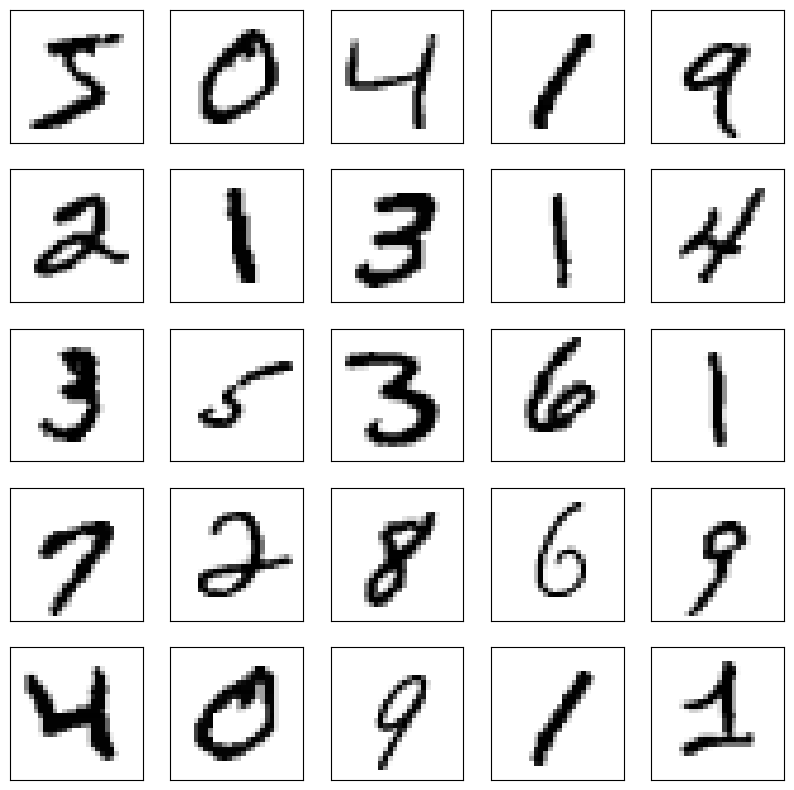

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

## model (1) :

In [8]:
model_1 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\pc\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history_1 = model_1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8826 - loss: 0.3840 - val_accuracy: 0.9815 - val_loss: 0.0589
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9815 - loss: 0.0596 - val_accuracy: 0.9889 - val_loss: 0.0363
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9870 - loss: 0.0418 - val_accuracy: 0.9878 - val_loss: 0.0366
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0316 - val_accuracy: 0.9909 - val_loss: 0.0297
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0245 - val_accuracy: 0.9906 - val_loss: 0.0308


In [11]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,888 (444.88 KB)

 Trainable params: 37,962 (148.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 75,926 (296.59 KB)

In [12]:
y_prediction_1 = model_1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
test_loss_1 , test_accuracy_1 = model_1.evaluate(x_test,y_test)
print(test_accuracy_1)
print(test_loss_1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9889 - loss: 0.0363
0.9905999898910522
0.030848294496536255


## model (2) :

In [14]:
model_2 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history_2 = model_2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8600 - loss: 0.4313 - val_accuracy: 0.9821 - val_loss: 0.0543
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9777 - loss: 0.0712 - val_accuracy: 0.9868 - val_loss: 0.0386
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9827 - loss: 0.0548 - val_accuracy: 0.9886 - val_loss: 0.0330
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9860 - loss: 0.0443 - val_accuracy: 0.9910 - val_loss: 0.0282
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9885 - loss: 0.0344 - val_accuracy: 0.9925 - val_loss: 0.0238


In [17]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,888 (444.88 KB)

 Trainable params: 37,962 (148.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 75,926 (296.59 KB)

In [18]:
y_prediction_2 = model_2.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [19]:
test_loss_2 , test_accuracy_2 = model_2.evaluate(x_test,y_test)
print(test_accuracy_2)
print(test_loss_2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9899 - loss: 0.0317
0.9925000071525574
0.023828165605664253


## model (3) :

In [20]:
model_3 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history_3 = model_3.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9077 - loss: 0.2882 - val_accuracy: 0.9860 - val_loss: 0.0446
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9846 - loss: 0.0472 - val_accuracy: 0.9900 - val_loss: 0.0313
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9910 - loss: 0.0302 - val_accuracy: 0.9903 - val_loss: 0.0272
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9924 - loss: 0.0233 - val_accuracy: 0.9911 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9949 - loss: 0.0168 - val_accuracy: 0.9905 - val_loss: 0.0339


In [23]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 448,928 (1.71 MB)

 Trainable params: 149,642 (584.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 299,286 (1.14 MB)

In [24]:
y_prediction_3 = model_3.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
test_loss_3 , test_accuracy_3 = model_3.evaluate(x_test,y_test)
print(test_accuracy_3)
print(test_loss_3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0.0399
0.9904999732971191
0.033912647515535355


## model (4) :

In [26]:
model_4 = keras.models.Sequential([
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size = (2,2) , strides = (2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2) , strides = (2,2)),
    keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

In [27]:
model_4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
history_4 = model_4.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8944 - loss: 0.3380 - val_accuracy: 0.9878 - val_loss: 0.0382
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9844 - loss: 0.0516 - val_accuracy: 0.9866 - val_loss: 0.0408
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9894 - loss: 0.0350 - val_accuracy: 0.9911 - val_loss: 0.0293
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9905 - val_loss: 0.0294
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9936 - loss: 0.0202 - val_accuracy: 0.9929 - val_loss: 0.0232


In [29]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 448,928 (1.71 MB)

 Trainable params: 149,642 (584.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 299,286 (1.14 MB)

In [30]:
y_prediction_4 = model_4.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [31]:
test_loss_4 , test_accuracy_4 = model_4.evaluate(x_test,y_test)
print(test_accuracy_4)
print(test_loss_4)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9900 - loss: 0.0319
0.992900013923645
0.023180894553661346


## Compare :

In [32]:
print(f"Model_1 Accuracy is : {test_accuracy_1}")
print('------------------------------------------------------------')
print(f"Model_2 Accuracy is : {test_accuracy_2}")
print('------------------------------------------------------------')
print(f"Model_3 Accuracy is : {test_accuracy_3}")
print('------------------------------------------------------------')
print(f"Model_4 Accuracy is : {test_accuracy_4}")

Model_1 Accuracy is : 0.9905999898910522
------------------------------------------------------------
Model_2 Accuracy is : 0.9925000071525574
------------------------------------------------------------
Model_3 Accuracy is : 0.9904999732971191
------------------------------------------------------------
Model_4 Accuracy is : 0.992900013923645
